In [1]:
from pyspark.sql.types import *
estructura=StructType([
    StructField("cFecha", StringType()),
    StructField("Fecha",StringType()),
    StructField("cCA", IntegerType()),
    StructField("CA",StringType()),
    StructField("cProv", IntegerType()),
    StructField("Prov",StringType()),
    StructField("cMun", IntegerType()),
    StructField("Mun",StringType()),
    StructField("Total",IntegerType()),
    StructField("HombreMenor25",IntegerType()),
    StructField("Hombre25a45",IntegerType()),
    StructField("HombreMayor45",IntegerType()),
    StructField("MujerMenor25",IntegerType()),
    StructField("Mujer25a45",IntegerType()),
    StructField("MujerMayor45",IntegerType())
]
)

In [2]:
#si no se ve bien añadir: encoding="cp1252"
datos=spark.read.csv("hdfs://localhost:9000/paro",
        sep=";",header=True,schema=estructura)

In [3]:
datos.printSchema(),datos.show(2,vertical=True)

root
 |-- cFecha: string (nullable = true)
 |-- Fecha: string (nullable = true)
 |-- cCA: integer (nullable = true)
 |-- CA: string (nullable = true)
 |-- cProv: integer (nullable = true)
 |-- Prov: string (nullable = true)
 |-- cMun: integer (nullable = true)
 |-- Mun: string (nullable = true)
 |-- Total: integer (nullable = true)
 |-- HombreMenor25: integer (nullable = true)
 |-- Hombre25a45: integer (nullable = true)
 |-- HombreMayor45: integer (nullable = true)
 |-- MujerMenor25: integer (nullable = true)
 |-- Mujer25a45: integer (nullable = true)
 |-- MujerMayor45: integer (nullable = true)

-RECORD 0----------------------
 cFecha        | 201601        
 Fecha         | Enero de 2016 
 cCA           | 1             
 CA            | Andalucía     
 cProv         | 4             
 Prov          | Almería       
 cMun          | 4001          
 Mun           | Abla          
 Total         | 94            
 HombreMenor25 | 3             
 Hombre25a45   | 23            
 HombreMayor

(None, None)

In [60]:
datosNuevos=datos.withColumn("Hombres",
    datos.HombreMenor25+datos.Hombre25a45+datos.HombreMayor45)\
    .withColumn("Mujeres",
    datos.MujerMenor25+datos.Mujer25a45+datos.MujerMayor45)\
    .drop("Fecha","cCA","cProv")
#datosNuevos.show()
datosNuevos.cache()

DataFrame[cFecha: string, CA: string, Prov: string, cMun: int, Mun: string, Total: int, HombreMenor25: int, Hombre25a45: int, HombreMayor45: int, MujerMenor25: int, Mujer25a45: int, MujerMayor45: int, Hombres: int, Mujeres: int]

In [61]:
datosNuevos.printSchema(),datosNuevos.show(2,vertical=True)

root
 |-- cFecha: string (nullable = true)
 |-- CA: string (nullable = true)
 |-- Prov: string (nullable = true)
 |-- cMun: integer (nullable = true)
 |-- Mun: string (nullable = true)
 |-- Total: integer (nullable = true)
 |-- HombreMenor25: integer (nullable = true)
 |-- Hombre25a45: integer (nullable = true)
 |-- HombreMayor45: integer (nullable = true)
 |-- MujerMenor25: integer (nullable = true)
 |-- Mujer25a45: integer (nullable = true)
 |-- MujerMayor45: integer (nullable = true)
 |-- Hombres: integer (nullable = true)
 |-- Mujeres: integer (nullable = true)

-RECORD 0------------------
 cFecha        | 201601    
 CA            | Andalucía 
 Prov          | Almería   
 cMun          | 4001      
 Mun           | Abla      
 Total         | 94        
 HombreMenor25 | 3         
 Hombre25a45   | 23        
 HombreMayor45 | 32        
 MujerMenor25  | 7         
 Mujer25a45    | 20        
 MujerMayor45  | 9         
 Hombres       | 58        
 Mujeres       | 36        
-RECORD

(None, None)

In [62]:
total=datosNuevos.where(datosNuevos.cFecha.like("201801"))\
    .groupBy("cFecha").sum("Hombres","Mujeres")
total.show()

+------+------------+------------+
|cFecha|sum(Hombres)|sum(Mujeres)|
+------+------------+------------+
|201801|     1475479|     2001049|
+------+------------+------------+



In [7]:
totalP=total.select(total["sum(Hombres)"].alias("Hombres"),
                   total["sum(Mujeres)"].alias("Mujeres"))\
    .toPandas()

In [8]:
totalP.plot(kind="bar")

In [9]:
datosNuevos.select("CA","Hombres","Mujeres").show()

+---------+-------+-------+
|       CA|Hombres|Mujeres|
+---------+-------+-------+
|Andalucía|     58|     36|
|Andalucía|     41|     34|
|Andalucía|   1218|   1266|
|Andalucía|     14|     14|
|Andalucía|     30|     16|
|Andalucía|    460|    518|
|Andalucía|     59|     23|
|Andalucía|     14|     11|
|Andalucía|      4|      3|
|Andalucía|     51|     32|
|Andalucía|    234|    234|
|Andalucía|      7|     11|
|Andalucía|  10725|  11692|
|Andalucía|      3|      6|
|Andalucía|      8|      2|
|Andalucía|     56|    113|
|Andalucía|     75|     89|
|Andalucía|     18|     12|
|Andalucía|      2|      4|
|Andalucía|     10|      4|
+---------+-------+-------+
only showing top 20 rows



In [10]:
datos.show(2,vertical=True)

-RECORD 0----------------------
 cFecha        | 201601        
 Fecha         | Enero de 2016 
 cCA           | 1             
 CA            | Andalucía     
 cProv         | 4             
 Prov          | Almería       
 cMun          | 4001          
 Mun           | Abla          
 Total         | 94            
 HombreMenor25 | 3             
 Hombre25a45   | 23            
 HombreMayor45 | 32            
 MujerMenor25  | 7             
 Mujer25a45    | 20            
 MujerMayor45  | 9             
-RECORD 1----------------------
 cFecha        | 201601        
 Fecha         | Enero de 2016 
 cCA           | 1             
 CA            | Andalucía     
 cProv         | 4             
 Prov          | Almería       
 cMun          | 4002          
 Mun           | Abrucena      
 Total         | 75            
 HombreMenor25 | 3             
 Hombre25a45   | 14            
 HombreMayor45 | 24            
 MujerMenor25  | 8             
 Mujer25a45    | 14            
 MujerMa

In [11]:
res=datosNuevos.where(datosNuevos.cFecha.like("201802"))\
    .groupBy("CA").sum("Hombres","Mujeres").orderBy("CA")
resP=res.toPandas()
res.show()

+--------------------+------------+------------+
|                  CA|sum(Hombres)|sum(Mujeres)|
+--------------------+------------+------------+
|           Andalucía|      357049|      486918|
|              Aragón|       28466|       41890|
|Asturias, Princip...|       35393|       44312|
|      Balears, Illes|       25792|       33589|
|            Canarias|       95288|      119794|
|           Cantabria|       19057|       22904|
|Castilla - La Mancha|       71242|      116697|
|     Castilla y León|       70206|       92422|
|            Cataluña|      184387|      233794|
|               Ceuta|        5067|        7031|
|Comunitat Valenciana|      161378|      231416|
|         Extremadura|       45684|       67255|
|             Galicia|       82033|      106174|
|Madrid, Comunidad de|      165322|      218141|
|             Melilla|        3662|        5374|
|   Murcia, Región de|       44789|       66757|
|Navarra, Comunida...|       15082|       21006|
|          País Vasc

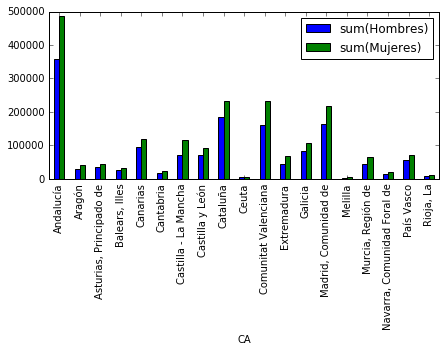

In [113]:
aux=resP.plot(x="CA",kind="bar",figsize=(7,3))


In [13]:
print(res.rdd.map(lambda a:a[0]).collect())#nombre de CCAA

['Andalucía', 'Aragón', 'Asturias, Principado de', 'Balears, Illes', 'Canarias', 'Cantabria', 'Castilla - La Mancha', 'Castilla y León', 'Cataluña', 'Ceuta', 'Comunitat Valenciana', 'Extremadura', 'Galicia', 'Madrid, Comunidad de', 'Melilla', 'Murcia, Región de', 'Navarra, Comunidad Foral de', 'País Vasco', 'Rioja, La']


In [14]:
print(res.rdd.map(lambda a:a[1]).collect()) #paro de Hombres

[357049, 28466, 35393, 25792, 95288, 19057, 71242, 70206, 184387, 5067, 161378, 45684, 82033, 165322, 3662, 44789, 15082, 55105, 7368]


In [15]:
print(res.rdd.map(lambda a:a[2]).collect())

[486918, 41890, 44312, 33589, 119794, 22904, 116697, 92422, 233794, 7031, 231416, 67255, 106174, 218141, 5374, 66757, 21006, 72130, 10274]


In [16]:
pob=spark.read.csv("../población/pobmun17.csv",
                   sep=";",header=True,encoding="cp1252",
                  inferSchema=True)

In [17]:
pob.show(7),pob.printSchema()

+----+---------+----+----------------+------+-------+-------+
|CPRO|PROVINCIA|CMUN|          NOMBRE| POB17|HOMBRES|MUJERES|
+----+---------+----+----------------+------+-------+-------+
|   2| Albacete|   1|       Abengibre|   748|    359|    389|
|   2| Albacete|   2|          Alatoz|   555|    309|    246|
|   2| Albacete|   3|        Albacete|172816|  84507|  88309|
|   2| Albacete|   4|        Albatana|   698|    362|    336|
|   2| Albacete|   5|         Alborea|   697|    357|    340|
|   2| Albacete|   6|        Alcadozo|   662|    361|    301|
|   2| Albacete|   7|Alcalá del Júcar|  1202|    642|    560|
+----+---------+----+----------------+------+-------+-------+
only showing top 7 rows

root
 |-- CPRO: integer (nullable = true)
 |-- PROVINCIA: string (nullable = true)
 |-- CMUN: integer (nullable = true)
 |-- NOMBRE: string (nullable = true)
 |-- POB17: integer (nullable = true)
 |-- HOMBRES: integer (nullable = true)
 |-- MUJERES: integer (nullable = true)



(None, None)

In [18]:
pob.where(pob.POB17.between(10000,300000) & (pob.PROVINCIA.like("O%rense"))).show()

+----+---------+----+--------------------+------+-------+-------+
|CPRO|PROVINCIA|CMUN|              NOMBRE| POB17|HOMBRES|MUJERES|
+----+---------+----+--------------------+------+-------+-------+
|  32|  Ourense|   8|            Barbadás| 10791|   5274|   5517|
|  32|  Ourense|   9|Barco de Valdeorr...| 13581|   6620|   6961|
|  32|  Ourense|  19|       Carballiño, O| 13854|   6491|   7363|
|  32|  Ourense|  54|             Ourense|105636|  48117|  57519|
|  32|  Ourense|  85|               Verín| 13889|   6710|   7179|
+----+---------+----+--------------------+------+-------+-------+



In [ ]:
# datosNuevos pob

In [41]:
dfCombinado=datosNuevos.join(pob,
                datosNuevos.Mun==pob.NOMBRE,"outer")

In [42]:
dfCombinado.show(2,vertical=True)

-RECORD 0-----------------------------
 cFecha        | 201601               
 CA            | Navarra, Comunida... 
 Prov          | Navarra              
 Mun           | Abaurregaina/Abau... 
 Total         | 2                    
 HombreMenor25 | 0                    
 Hombre25a45   | 0                    
 HombreMayor45 | 1                    
 MujerMenor25  | 0                    
 Mujer25a45    | 0                    
 MujerMayor45  | 1                    
 Hombres       | 1                    
 Mujeres       | 1                    
 CPRO          | 31                   
 PROVINCIA     | Navarra              
 CMUN          | 3                    
 NOMBRE        | Abaurregaina/Abau... 
 POB17         | 124                  
 HOMBRES       | 77                   
 MUJERES       | 47                   
-RECORD 1-----------------------------
 cFecha        | 201602               
 CA            | Navarra, Comunida... 
 Prov          | Navarra              
 Mun           | Abaurreg

In [43]:
dfCombinado.count(),datosNuevos.count()

(253014, 251906)

In [48]:
dfCombinado\
.where(dfCombinado.Mun.isNull() | dfCombinado.NOMBRE.isNull())\
.select("Mun","NOMBRE").orderBy("Mun").distinct()\
.show(200)

+--------------------+--------------------+
|                 Mun|              NOMBRE|
+--------------------+--------------------+
|                null|              Sopela|
|                null|          Lantejuela|
|                null|        Torla-Ordesa|
|                null|Manjabálago y Ort...|
|                null|Valle de Egüés/Eg...|
|                null|     Montroi/Montroy|
|                null|             Potries|
|                null|   Barañáin/Barañain|
|                null| Agurain/Salvatierra|
|                null|             Espeluy|
|                null|        Esquirol, L'|
|                null|Alqueries, les/Al...|
|                null|                Xert|
|                null|Cruïlles, Monells...|
|                null|Santa Eulària des...|
|                null|      Villa de Otura|
|                null|Valle de Ollo/Oll...|
|                null|      Bidania-Goiatz|
|                null|               Arcas|
|                null|        Ro

In [94]:
pob2=pob.withColumn("cMun2",pob.CPRO*1000+pob.CMUN)\
    .drop("CMUN").withColumnRenamed("HOMBRES","Hom")\
    .withColumnRenamed("MUJERES","Muj")
pob2.show(2)

+----+---------+---------+-----+---+---+-----+
|CPRO|PROVINCIA|   NOMBRE|POB17|Hom|Muj|cMun2|
+----+---------+---------+-----+---+---+-----+
|   2| Albacete|Abengibre|  748|359|389| 2001|
|   2| Albacete|   Alatoz|  555|309|246| 2002|
+----+---------+---------+-----+---+---+-----+
only showing top 2 rows



In [95]:
datosCombina2=datosNuevos.join(pob2,
                datosNuevos.cMun==pob2.cMun2,"inner")

In [96]:
datosCombina2.where(datosCombina2.cMun2.isNull())\
        .select("Mun").distinct().show()

+---+
|Mun|
+---+
+---+



In [97]:
datosCombina2=datosCombina2.drop("CPRO",
                                 "PROVINCIA",
                                "NOMBRE",
                                "cMun2")
datosCombina2.show(vertical=True)

-RECORD 0-----------------------------
 cFecha        | 201601               
 CA            | Andalucía            
 Prov          | Almería              
 cMun          | 4001                 
 Mun           | Abla                 
 Total         | 94                   
 HombreMenor25 | 3                    
 Hombre25a45   | 23                   
 HombreMayor45 | 32                   
 MujerMenor25  | 7                    
 Mujer25a45    | 20                   
 MujerMayor45  | 9                    
 Hombres       | 58                   
 Mujeres       | 36                   
 POB17         | 1267                 
 Hom           | 651                  
 Muj           | 616                  
-RECORD 1-----------------------------
 cFecha        | 201601               
 CA            | Andalucía            
 Prov          | Almería              
 cMun          | 4002                 
 Mun           | Abrucena             
 Total         | 75                   
 HombreMenor25 | 3       

+--------------------+------------+------------+---------+---------+
|                  CA|sum(Hombres)|sum(Mujeres)| sum(Hom)| sum(Muj)|
+--------------------+------------+------------+---------+---------+
|              Aragón|      980832|     1350324| 20022745| 20548505|
|Comunitat Valenciana|     5412299|     7408799| 75522293| 77664486|
|           Cantabria|      602164|      683149|  8736048|  9253097|
|         Extremadura|     1476753|     2113186| 16573716| 16878105|
|             Galicia|     2709247|     3408824| 40345849| 43423343|
|      Balears, Illes|      747259|      904785| 17202675| 17393294|
|               Ceuta|      162829|      225277|  1334054|  1299675|
|            Canarias|     3138848|     3862650| 32398503| 32953248|
|           Andalucía|    11804114|    15315277|128148885|131625535|
|Asturias, Princip...|     1126227|     1373251| 15311241| 16772519|
|Navarra, Comunida...|      504661|      677008|  9878801| 10061453|
|           Rioja, La|      240925

In [104]:
res=datosCombina2.where(datosCombina2.cFecha=="201802")\
.groupBy("CA").sum("Hombres","Mujeres","Hom","Muj")
res.show()

+--------------------+------------+------------+--------+--------+
|                  CA|sum(Hombres)|sum(Mujeres)|sum(Hom)|sum(Muj)|
+--------------------+------------+------------+--------+--------+
|              Aragón|       28466|       41890|  645895|  662855|
|Comunitat Valenciana|      161378|      231416| 2436203| 2505306|
|           Cantabria|       19057|       22904|  281808|  298487|
|         Extremadura|       45684|       67255|  534636|  544455|
|             Galicia|       81698|      105841| 1301479| 1400753|
|      Balears, Illes|       25792|       33589|  554925|  561074|
|               Ceuta|        5067|        7031|   43034|   41925|
|            Canarias|       95288|      119794| 1045113| 1063008|
|           Andalucía|      357049|      486918| 4133835| 4245985|
|Asturias, Princip...|       35393|       44312|  493911|  541049|
|Navarra, Comunida...|       15082|       21006|  318671|  324563|
|           Rioja, La|        7368|       10274|  155508|  159

In [121]:
resP=res.withColumn("porH",
    res["sum(Hombres)"]*100/res["sum(Hom)"])\
    .withColumn("porM",
    res["sum(Mujeres)"]*100/res["sum(Muj)"])\
    .select("CA","porH","porM").orderBy("porM").toPandas()


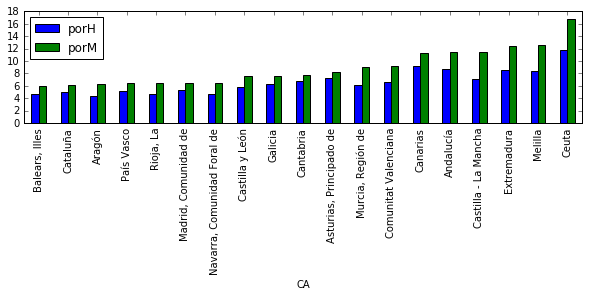

In [125]:
resP.plot.bar(x="CA",figsize=(10,2))